In [1]:
import os,glob
import pandas as pd
import pygmt
import pickle
import warnings  
warnings.filterwarnings("ignore")

In [36]:
pygmt.config(FONT_ANNOT_PRIMARY = '10p,Times-Roman',
            FONT_LABEL = '8',
            MAP_LABEL_OFFSET = '4p',
            MAP_TICK_LENGTH_PRIMARY = '5p',
            PROJ_LENGTH_UNIT = 'c',
            MAP_ANNOT_OFFSET_PRIMARY = '5p',
            MAP_ANNOT_OFFSET_SECONDARY = '5p',
            MAP_FRAME_TYPE = 'fancy',
            MAP_FRAME_WIDTH = 'auto',
            FORMAT_GEO_MAP = 'D',
            PS_CHAR_ENCODING = 'Standard+',
            MAP_FRAME_PEN = '2p,black')


def PygmtBegin(figmap, region, title, background):
    figmap.basemap(region=region, projection="M15c", frame = ['x1f0.5', 'y1f0.5', f'nSeW+t"{title}"'])
    if background == 'Pn':
        grdpath = '/Volumes/home/Research/GMT/PnAni/out.grd'
        Pnvel = pygmt.makecpt(cmap='jet',series=[7.5,8.5,0.2], reverse=True, transparency=True, continuous=True )
        figmap.grdimage(grdpath, region=region, cmap=Pnvel, transparency=30)
        with pygmt.config(FONT_ANNOT_PRIMARY = '9p,Times-Roman', FONT_LABEL = '12p,5',
                  MAP_ANNOT_OFFSET_PRIMARY = '0.15c', MAP_LABEL_OFFSET = '0.2c', 
                  MAP_TICK_LENGTH_PRIMARY = '0.1c', MAP_FRAME_PEN = '1.5p'):          
            figmap.colorbar(position='x0.7c/1c+w4c/0.3c+h+ml',frame='a0.5f0.25+l"Pn velocity (km/s)"', cmap = Pnvel)  
    else:
        SVel = pygmt.makecpt(cmap='polar',series=[-6,6,0.5], reverse=True, transparency=True, continuous=True )

        if  background == 'S100':
            grdpath = '/Volumes/home/Research/GMT/Regional_Tomo_Kounoudis2020/Sout100.grd'
        elif background == 'S190':
            grdpath = '/Volumes/home/Research/GMT/Regional_Tomo_Kounoudis2020/Sout190.grd'
        else: 
            print('========please select S100 or S190!========')
            
        figmap.grdimage(grdpath, region=region, cmap=SVel, transparency=30)
        with pygmt.config(FONT_ANNOT_PRIMARY = '9p,Times-Roman', FONT_LABEL = '12p,5',
                  MAP_ANNOT_OFFSET_PRIMARY = '0.15c', MAP_LABEL_OFFSET = '0.2c', 
                  MAP_TICK_LENGTH_PRIMARY = '0.1c', MAP_FRAME_PEN = '1.5p'):          
            figmap.colorbar(position='x0.7c/1c+w4c/0.3c+h+ml',frame='a2f0.5+l"S anomaly (%)"', cmap = SVel) 
    figmap.coast(resolution = 'h', shorelines ='1/thinnest,black', water='white', borders = '1/0.25p')
#     figmap.plot(data=smooth_fault,pen='1p,brown')
    Volcano = '/Volumes/home/Research/DataBase/01_Armenia/02_Volcano_list.csv'
    dv = pd.read_csv(Volcano)
    figmap.plot(x=dv['lon'],y=dv['lat'],style="kvolcano/0.4c", pen='0.1p,black', color="black")
def PiercePoint(evdep, stlat, stlon, evlat, evlon, phase, PierceDep):
        
    cmd = """
    taup pierce -mod iasp91 -h %(evdep)f -sta %(stlat)f %(stlon)f -evt %(evlat)f %(evlon)f -ph %(phase)s --pierce %(PierceDep)f -nodiscon  > temp.txt
    """ % locals()
    os.system(cmd)

    if evdep > PierceDep:
        cmd = """
        cat temp.txt | awk 'NR==2 {print$4, $5}'
        """ % locals()
        p = os.popen(cmd)
        text = str(p.read())
        p.close()
        p_lat=float(text.rsplit(' ')[0])
        p_lon=float(text.rsplit(' ')[1][:-1])
    elif evdep <= PierceDep:
        cmd = """
        cat temp.txt | awk 'NR==3 {print$4, $5}'
        """ % locals()
        p = os.popen(cmd)
        text = str(p.read())
        p.close()
        p_lat=float(text.rsplit(' ')[0])
        p_lon=float(text.rsplit(' ')[1][:-1])  
    
    return p_lon, p_lat

In [31]:
PKLpath = '/Volumes/home/Research/STEP/01_Split'
path    = '/Volumes/home/Research/STEP/02_Station_result_csv'
remove  = '/Volumes/home/Research/STEP/05_Station_result_statistics/V4_Remove_catalog.txt'
figpath = '/Volumes/home/Research/STEP/12_PiercePoint'
smooth_fault='/Volumes/home/Research/DataBase/01_Armenia/00_smooth_fault_7.txt'
Afault='/Volumes/home/Research/DataBase/01_Armenia/00_A_fault_20220624.txt'
method = 'SC'

In [32]:
dr = pd.read_csv(remove,sep='\s+',names=['station','time','phase','a','b','c','d','e','f','g'])

==================IU.GNI==================
GNI 20131123_074832
GNI 20200613_210830
GNI 20130514_003226
==================II.KIV==================
KIV 20140326_032936
KIV 20181223_230843
KIV 20170926_042000
==================TG.ABST==================
==================TG.AMBR==================
==================TG.AZMN==================
==================TG.BATM==================
==================TG.BKRG==================
==================TG.BRNG==================
==================TG.BURN==================
==================TG.DDFL==================
==================TG.DMNI==================
==================TG.GANZ==================
==================TG.GUDA==================
==================TG.KHVA==================
==================TG.KZRT==================
==================TG.LGD==================
==================TG.TKBL==================
==================TG.TRLT==================
==================TG.URAV==================
==================GO.AKH==================
====

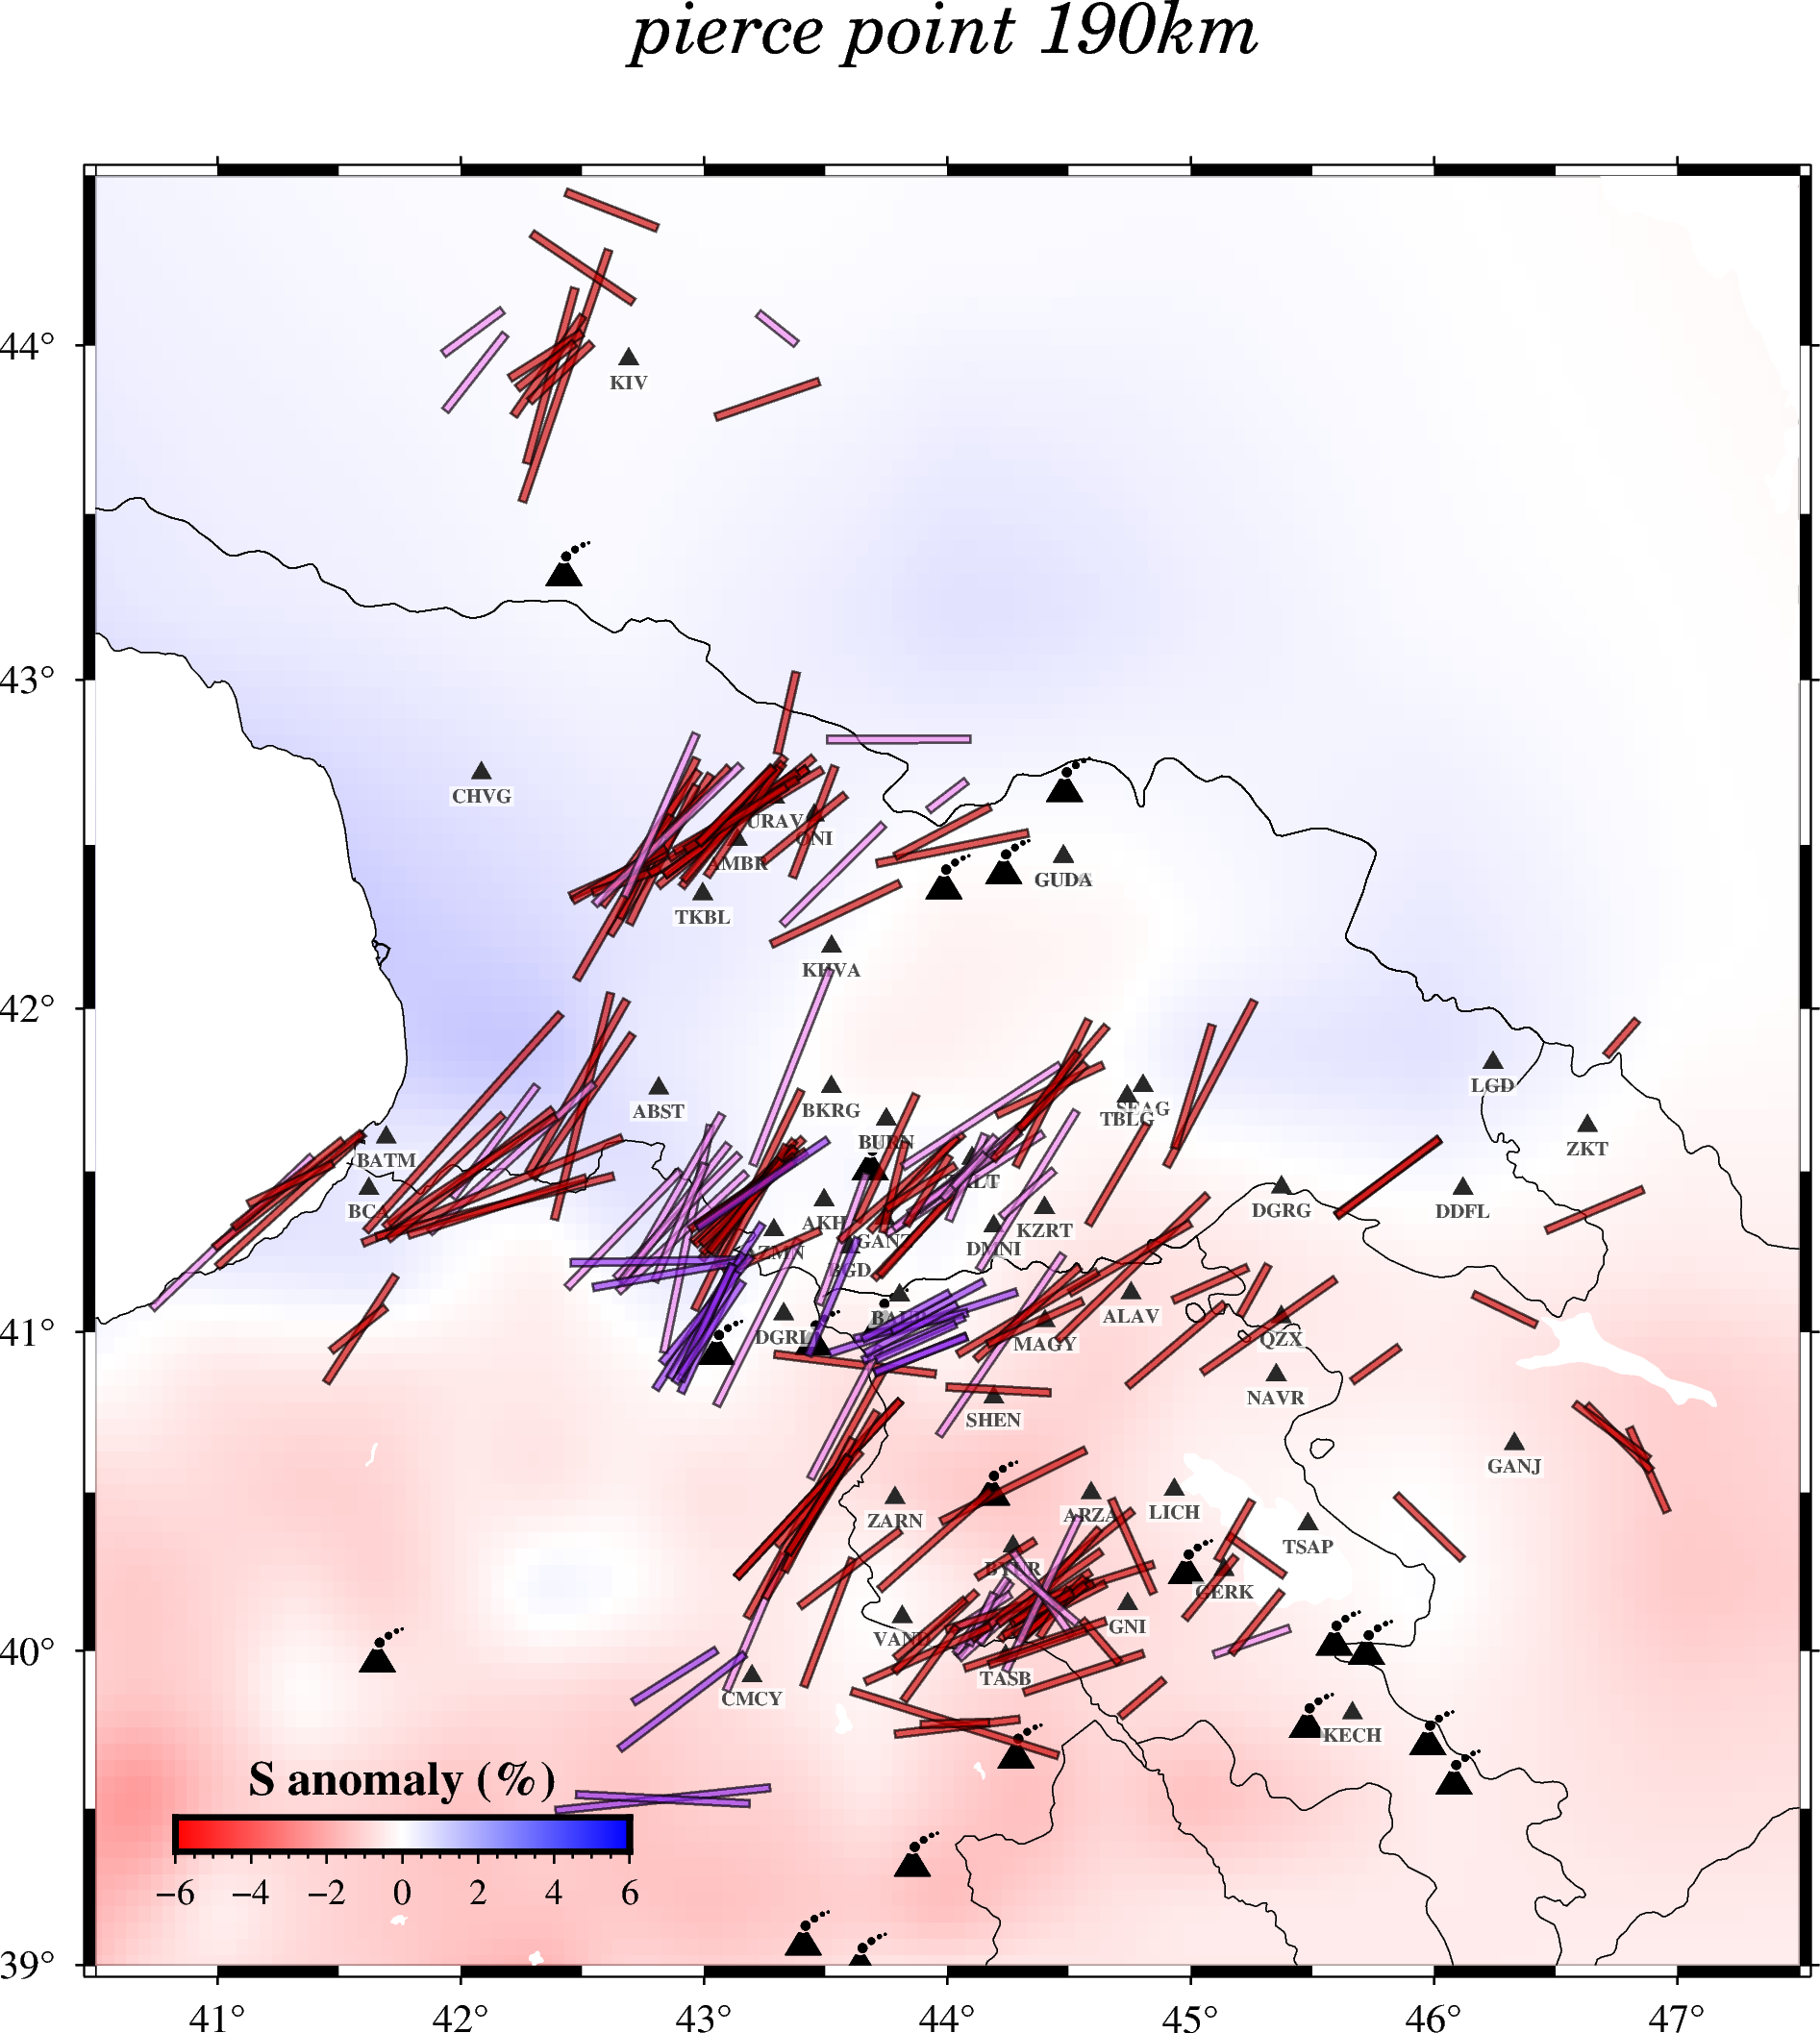

In [38]:
# region = [40, 47, 39.5, 44.5] original
# region = [42, 47, 38.5, 42] ## for AM
# region = [42.5, 46, 39, 41] ##for GNI
# region = [40.5, 47, 40.5, 43.5] ## for GO
# region = [41, 44, 43, 44.5] ## for KIV
region = [40.5, 47.5, 39, 44.5] ##for all
fig = 'All'
back = 'S190' #S100 #190


for PierceDep in [190]:
    figmap = pygmt.Figure()
    title = f"pierce point {PierceDep}km"
    PygmtBegin(figmap,region,title,background=back)
    for pkl in sorted(glob.glob(f'{PKLpath}/*.pkl')):
        STApkl = pickle.load(open(pkl, "rb"))
        values = [value for keys, value in STApkl.items() ][0]
        sta = values['station']
        stlat = values['latitude']; stlon = values['longitude']
        figmap.plot(x=stlon, y=stlat, style="t0.1c", color='70', pen="1.5p,40")
        figmap.text(x=stlon,y=stlat-0.07,text=sta, font="5p,Times-Bold,black",fill='white',transparency=30)
        
    for NET in ['IU','II','TG','GO','KO','AB','AM','XG']:    
        for pkl in sorted(glob.glob(f'{PKLpath}/{NET}*.pkl')):
            STApkl = pickle.load(open(pkl, "rb"))
            values = [value for keys, value in STApkl.items() ][0]
            net = values['network']; sta = values['station']
            stlat = values['latitude']; stlon = values['longitude']

#             figmap.plot(x=stlon, y=stlat, style="t0.1c", color='black', pen="1.5p,black")
            print(f'=================={net}.{sta}==================')

            for resultpath in sorted(glob.glob(f'{path}/2010-2020_*_classify/{net}.{sta}*result.csv')):
                df = pd.read_csv(resultpath)
                dff = df[df['Null']==False][df['Quality']!='Poor'][df['Pick']==True]
                dfff = df[df['Null']==True][df['Pick']==True]
                dff = dff.sort_values(by=['SCdt'], ascending=False)
                  
                for i in range(len(dff)):
                    event = dff['Event'].values[i]
                    evlat = dff['Ev_lat'].values[i]
                    evlon = dff['Ev_lon'].values[i]
                    evdep = dff['Depth'].values[i]
                    phase = dff['Phase'].values[i]
                    if sta in dr['station'].to_list() and event in dr['time'].to_list():
                            print(f'{sta} {event}')
                    else:
                        if method == 'SC': 
                            phi = dff['SCPhi'].values[i]
                            dt  = dff['SCdt'].values[i]
                            if phase == 'SKS': color = 'red3'
                            elif phase == 'SKKS': color = 'violet'
                            
                            if sta == 'CMCY' or sta == 'DGRL' :
                                color = 'purple2'
                        elif method == 'RC': 
                            phi = dff['RCPhi'].values[i]
                            dt  = dff['RCdt'].values[i]          
                            if phase == 'SKS': color = 'deepskyblue1'
                            elif phase == 'SKKS': color = 'skyblue'            
                        p_lon, p_lat = PiercePoint(evdep, stlat, stlon, evlat, evlon, phase, PierceDep)
                        data = [[p_lon, p_lat, phi-90, 2.5, dt*40]]
                        figmap.plot(data=data, style="J", color=color, pen="0.5p,black",transparency=35, no_clip=True)                            

            
figmap.show()
figmap.savefig(f'{figpath}/non-null/{fig}_{back}.pdf')
figmap.savefig(f'{figpath}/non-null/{fig}_{back}.png', dpi=200)
        